## Name: Nken Allassan
## Date: June/24/2020

### Hello, in this file i will try to do as much as possible to _tell you a story_ about this data
### i'm not that familiar to this task but i will try my best to get insights from it let's go

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb

## Loading the train and test file

In [2]:
train=pd.read_csv('allassan_train.csv')
test=pd.read_csv('allassan_test.csv')

In [81]:
train.tail(10)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year_to_date
135483,62,train_Client_99990,11,303,2012-12-10,0.0,2015-01-28,11,416794,0,...,1,703,0,0,0,2201,2904,4,ELEC,779 days
135484,63,train_Client_99991,11,311,2014-05-22,0.0,2019-06-13,11,243261,0,...,1,208,0,0,0,6911,7119,4,ELEC,1848 days
135485,60,train_Client_99992,11,101,2009-03-13,0.0,2016-10-21,40,65938,0,...,1,0,0,0,0,0,0,26,GAZ,2779 days
135486,60,train_Client_99993,11,101,2006-11-17,0.0,2009-04-13,10,1090709,0,...,1,200,172,0,0,2995,3367,4,ELEC,878 days
135487,60,train_Client_99994,11,101,1978-12-12,0.0,2006-12-14,10,945652,0,...,1,0,0,0,0,8147,8147,8,ELEC,10229 days
135488,62,train_Client_99995,11,304,2004-07-26,0.0,2005-07-10,11,897286,0,...,1,0,0,0,0,14,14,4,ELEC,349 days
135489,63,train_Client_99996,11,311,2012-10-25,0.0,2015-10-20,11,398783,0,...,1,605,0,0,0,895,1500,4,ELEC,1090 days
135490,63,train_Client_99997,11,311,2011-11-22,0.0,2015-08-06,11,262195,0,...,1,280,0,0,0,3573,3853,4,ELEC,1353 days
135491,60,train_Client_99998,11,101,1993-12-22,0.0,2005-08-19,10,1253571,0,...,1,400,135,0,0,3197,3732,8,ELEC,4258 days
135492,60,train_Client_99999,11,101,1986-02-18,0.0,1996-09-25,11,560948,0,...,1,259,0,0,0,13884,14143,4,ELEC,3872 days


In [64]:
train.invoice_date=pd.to_datetime(train.invoice_date)

In [65]:
train.isnull().sum()

disrict                 0
client_id               0
client_catg             0
region                  0
creation_date           0
target                  0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [66]:
train.dtypes

disrict                          int64
client_id                       object
client_catg                      int64
region                           int64
creation_date           datetime64[ns]
target                         float64
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                   int64
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

In [57]:
train.creation_date=pd.to_datetime(train.creation_date)

In [67]:
train["year_to_date"]=train.invoice_date - train.creation_date

In [74]:
to_find_date=train[train.target==1]

In [4]:
test.tail(10)

,disrict,client_id,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
58059,62,test_Client_9990,11,371,30/07/2016,2018-11-28,11,2155701680400,0,207,9,1,341,0,0,0,2083,2424,4,ELEC
58060,60,test_Client_9991,11,101,17/10/2006,2010-10-08,11,784562,0,203,6,1,1200,19,0,0,29890,31109,4,ELEC
58061,69,test_Client_9992,11,104,07/04/1997,2009-02-03,11,15668,0,420,6,1,1200,4440,0,0,10559,16199,4,ELEC
58062,60,test_Client_9993,11,101,10/11/1987,2010-05-20,11,691422,0,203,6,1,639,0,0,0,24458,25097,4,ELEC
58063,69,test_Client_9994,11,104,07/04/1987,2011-08-18,40,164143,0,5,8,1,71,0,0,0,768,839,4,GAZ
58064,63,test_Client_9995,11,399,17/03/2010,2010-08-07,11,1251009,0,203,6,1,907,0,0,0,20269,21176,4,ELEC
58065,63,test_Client_9996,11,311,28/05/2011,2018-01-06,40,328772,0,5,6,1,120,0,0,0,1893,2013,4,GAZ
58066,60,test_Client_9997,11,101,04/03/1978,2010-05-08,10,7956758,0,202,9,1,100,174,0,0,19200,19474,2,ELEC
58067,60,test_Client_9998,11,101,23/02/2018,2018-04-24,11,2168700021859,0,420,9,1,800,400,727,0,0,1927,4,ELEC
58068,69,test_Client_9999,11,104,14/03/1990,2015-06-29,11,869269,0,203,9,1,520,0,0,0,27239,27759,4,ELEC


### let's start by counting the number of fraudulent and none-fraudulent client_id

In [5]:
train['target'].value_counts()

0.0    127927
1.0      7566
Name: target, dtype: int64

In [6]:
print('percentage non-fraudulent: {:.2f} \npercentage fraudulent: {:.2f}'.format((127927/135493)*100,(7566/135493)*100))

percentage non-fraudulent: 94.42 
percentage fraudulent: 5.58


### Alright we have 7566 fraudulent and 127927 non fraudulent clients
1. i will try to find out how the data has been structured, first of all we know we have to deal with an imbalanced dataset (traget)
2. Also is there any relationship between the target and categorical variable? 

In [7]:
train.creation_date.min()

'01/01/1997'

In [8]:
train.creation_date.max()

'31/12/2018'

In [9]:
test.creation_date.min()

'01/01/1997'

In [10]:
test.creation_date.max()

'31/12/2018'

It seems as the test set and train set has been collected at the same moment..

In [11]:
train.counter_statue.value_counts()

0         130665
1           3785
5            714
4            276
3             46
2              5
618            1
269375         1
Name: counter_statue, dtype: int64

In [12]:
test.counter_statue.value_counts()

0    55948
1     1676
5      324
4      106
3       12
2        3
Name: counter_statue, dtype: int64

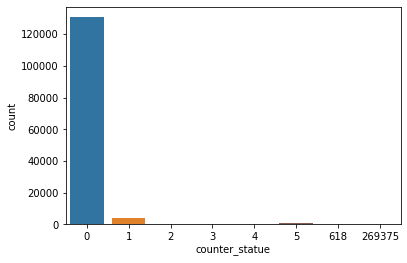

In [13]:
sb.countplot(data=train,x='counter_statue')

In [14]:
train[(train.counter_statue) & (train.target==1)].counter_statue.value_counts()

1    159
5     57
Name: counter_statue, dtype: int64

In [15]:
train[(train.counter_statue) & (train.target==0)].counter_statue.value_counts()

1         3626
5          657
3           46
269375       1
Name: counter_statue, dtype: int64

from the variable description file, __counter_statue__ takes up to 5 values such as working fine,not working..etc
from the result above we can deduce that only the statue numbers __1__,__5__,__3__,__269375__ reveal informations on the target

In [16]:
train.reading_remarque.value_counts()

6      65287
9      47991
8      21979
7        234
203        1
413        1
Name: reading_remarque, dtype: int64

In [23]:
print('percentage values {:.2f}'.format((236/135493)*100))

percentage values 0.17


In [24]:
test.reading_remarque.value_counts()

6    27875
9    20660
8     9420
7      114
Name: reading_remarque, dtype: int64

the reading remarque are split with thesame ratio in train and test set

In [25]:
print('percentage values {:.2f}'.format((114/58069)*100))

percentage values 0.20


In [26]:
train[(train.reading_remarque) & (train.target==1)].reading_remarque.value_counts()

9    2724
Name: reading_remarque, dtype: int64

Does this means that the only reading_remarque value number __9__ gives a bad result with respect to fraudulent value? lets check it out..

In [27]:
train[(train.reading_remarque) & (train.target==0)].reading_remarque.value_counts()

9      45267
7        234
413        1
203        1
Name: reading_remarque, dtype: int64

Waouh the training dataset reveal that with respect to the target, the training remarque __6__ and __8__ gives no information,can we creat 3 categories? one as been good_remarque, order as bad and the order as been unknown and this goes same for the other categories 

In [28]:
train.counter_coefficient.value_counts()

1     135456
2         20
3          9
40         2
6          2
50         1
30         1
20         1
0          1
Name: counter_coefficient, dtype: int64

In [29]:
print('percentage 1 {:.3f}'.format((135456/135493)*100))

percentage 1 99.973


In [30]:
test.counter_coefficient.value_counts()

1     58053
2        11
3         3
10        1
4         1
Name: counter_coefficient, dtype: int64

In [31]:
print('percentage 1 {:.3f}'.format((58053/58069)*100))

percentage 1 99.972


not tested for every body but i think each category in the testset has been split with the same ratio as the trainset it is important to note that..does that means the target's test set is splitted with thesame ratio as the target's train set?

In [32]:
train.months_number.value_counts()

4         102817
2          11794
8           9913
12          2459
6           2114
           ...  
97846          1
55             1
472737         1
183            1
331609         1
Name: months_number, Length: 93, dtype: int64

In [33]:
test.months_number.value_counts()

4        44277
2         4949
8         4156
12        1064
6          942
         ...  
8744         1
36507        1
41           1
77357        1
45           1
Name: months_number, Length: 71, dtype: int64

what we should conclude is that we must take care of categories balancing...

### The train and test set _creation_date_ reveal an information they seems to have been collected at the same period 
1. also there are many categorical variable which we will going to groupby target to see whether we can get information about that

In [34]:
train.counter_type.value_counts()

ELEC    106673
GAZ      28820
Name: counter_type, dtype: int64

In [35]:
print('percentage ELEC: {:.2f} \npercentage GAZ: {:.2f}'.format((106673/135493)*100,(28820/135493)*100))

percentage ELEC: 78.73 
percentage GAZ: 21.27


In [36]:
test.counter_type.value_counts()

ELEC    45763
GAZ     12306
Name: counter_type, dtype: int64

In [37]:
print('percentage ELEC: {:.2f} \npercentage GAZ: {:.2f}'.format((45763/58069)*100,(12306/58069)*100))

percentage ELEC: 78.81 
percentage GAZ: 21.19


after googling we got a new variable which we will use in feature engineering __consumption reading__

In [38]:
train[(train.counter_type=='ELEC')&(train.target==0)].counter_type.value_counts()

ELEC    101119
Name: counter_type, dtype: int64

most people using gaz counter energy seems to be much likely to be fraudulent compare to electrical counter enrgy

In [39]:
train.client_catg.value_counts()

11    131494
12      2321
51      1678
Name: client_catg, dtype: int64

In [40]:
test.client_catg.value_counts()

11    56305
12     1054
51      710
Name: client_catg, dtype: int64

In [41]:
train.tarif_type.value_counts()

11    94030
40    28600
10    10284
15     1381
29      233
45      214
13      211
14      208
12      185
9       134
30        6
21        5
24        1
8         1
Name: tarif_type, dtype: int64

In [42]:
test.tarif_type.value_counts()

11    40250
40    12214
10     4491
15      587
13      106
14       93
29       92
45       92
12       85
9        53
21        4
27        1
24        1
Name: tarif_type, dtype: int64

we can dissociate the different categories and i think those with very high numbers counts, are most likely to give a non-fraudulent remark but it does'nt exclude the fact that some are still fraudulent can we get inside from that?
1. is there any old_index greater than the new index?

In [43]:
hd=train[(train.old_index)>(train.new_index)]
hd.target.value_counts()

0.0    76
1.0     8
Name: target, dtype: int64

In [44]:
hd.tail()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
126738,60,train_Client_92118,11,101,06/11/1986,0.0,2011-06-07,11,3659214,0,...,6,1,1200,1731,0,0,97780,711,4,ELEC
128390,69,train_Client_93605,11,107,23/12/1988,0.0,2016-12-05,11,698900,0,...,9,1,800,400,800,8439,90827,1266,4,ELEC
129061,60,train_Client_94209,11,101,31/10/2007,0.0,2009-04-03,11,8322016,0,...,6,1,1200,191,0,0,8967,358,4,ELEC
132914,62,train_Client_97678,11,310,03/12/1980,1.0,2006-03-05,13,630254,0,...,6,1,2022,0,0,0,99523,1545,2,ELEC
133485,60,train_Client_98191,11,101,01/02/2007,0.0,2018-02-07,15,8393743,0,...,8,1,399,0,0,0,9705,104,8,ELEC


Waouh i taught getting an old_index greater than the new one will reveal any information but it does'nt

let's try to get more insights

In [45]:
let=train[train.target==1]

In [46]:
let.head(10)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
41,63,train_Client_100032,11,308,07/11/2012,1.0,2017-02-24,11,393848,0,...,9,1,781,0,0,0,3844,4625,8,ELEC
46,62,train_Client_100037,11,307,16/09/2009,1.0,2012-09-19,11,125055,0,...,8,1,2144,0,0,0,7527,9671,8,ELEC
97,69,train_Client_100083,11,107,26/10/1982,1.0,2008-07-17,11,236489,0,...,6,1,400,0,0,0,36706,37106,4,ELEC
106,60,train_Client_100091,11,101,22/02/2011,1.0,2014-06-24,40,425183,0,...,6,1,0,0,0,0,0,0,4,GAZ
126,63,train_Client_100109,11,312,27/12/1990,1.0,2008-07-29,11,57323,0,...,6,1,124,0,0,0,2253,2377,4,ELEC
152,69,train_Client_100132,11,106,31/12/1990,1.0,2005-12-20,11,40582,0,...,6,1,1200,891,0,0,17523,19614,4,ELEC
201,63,train_Client_100177,11,306,22/12/1998,1.0,2011-04-20,11,221887,0,...,6,1,417,0,0,0,14270,14687,4,ELEC
245,63,train_Client_100216,11,311,24/11/1992,1.0,2008-07-03,11,1170937,0,...,6,1,118,0,0,0,915,1033,4,ELEC
249,69,train_Client_10022,11,107,30/11/1998,1.0,2015-11-06,11,296693,0,...,9,1,391,0,0,0,22896,23287,4,ELEC
266,62,train_Client_100235,11,302,17/05/2011,1.0,2012-06-11,11,265162,0,...,9,1,173,0,0,0,110,283,4,ELEC


In [47]:
hd.counter_number.value_counts()

8363391     1
8394924     1
19762       1
57121       1
3106        1
           ..
30162       1
49949018    1
8322016     1
1255769     1
8393743     1
Name: counter_number, Length: 84, dtype: int64

In [48]:
train[(train.consommation_level_2==0)&(train.consommation_level_3==0)&(train.consommation_level_4==0)&(train.target==1)].target.value_counts()

1.0    5945
Name: target, dtype: int64

In [49]:
train[(train.consommation_level_2==0)&(train.consommation_level_3==0)&(train.consommation_level_4==0)]

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,69,train_Client_1,11,107,29/05/2002,0.0,2010-09-02,11,678902,0,...,8,1,388,0,0,0,11429,11817,2,ELEC
2,62,train_Client_10,11,301,13/03/1986,0.0,2010-02-15,11,572765,0,...,8,1,407,0,0,0,31955,32362,4,ELEC
3,69,train_Client_100,11,105,11/07/1996,0.0,2009-10-22,11,2078,0,...,6,1,0,0,0,0,98,98,4,ELEC
5,69,train_Client_10000,11,103,29/09/1993,0.0,2015-12-05,40,205147,0,...,9,1,693,0,0,0,4355,5048,4,GAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135487,60,train_Client_99994,11,101,12/12/1978,0.0,2006-12-14,10,945652,0,...,6,1,0,0,0,0,8147,8147,8,ELEC
135488,62,train_Client_99995,11,304,26/07/2004,0.0,2005-07-10,11,897286,0,...,6,1,0,0,0,0,14,14,4,ELEC
135489,63,train_Client_99996,11,311,25/10/2012,0.0,2015-10-20,11,398783,0,...,9,1,605,0,0,0,895,1500,4,ELEC
135490,63,train_Client_99997,11,311,22/11/2011,0.0,2015-08-06,11,262195,0,...,9,1,280,0,0,0,3573,3853,4,ELEC


In [50]:
print('let see: {:.2f}'.format(114438/135493))

let see: 0.84


a very high number of customers having a consommation_level_2,3,4 of 0 are said to be fraudulent

In [51]:
test[(test.consommation_level_2==0)&(test.consommation_level_3==0)&(test.consommation_level_4==0)]

,disrict,client_id,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,62,test_Client_0,11,307,28/05/2002,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
3,60,test_Client_100,11,101,08/10/1992,2011-06-24,11,1064358,0,203,6,1,562,0,0,0,30748,31310,4,ELEC
4,62,test_Client_1000,11,301,21/07/1977,2007-10-18,11,8524250,0,203,9,1,860,0,0,0,39827,40687,4,ELEC
6,62,test_Client_10001,11,303,13/09/2005,2009-09-06,40,6772095,0,5,6,1,0,0,0,0,19,19,4,GAZ
7,69,test_Client_10002,11,104,10/02/2011,2016-02-12,45,511069,0,25,9,1,228,0,0,0,41916,42144,1,GAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58062,60,test_Client_9993,11,101,10/11/1987,2010-05-20,11,691422,0,203,6,1,639,0,0,0,24458,25097,4,ELEC
58063,69,test_Client_9994,11,104,07/04/1987,2011-08-18,40,164143,0,5,8,1,71,0,0,0,768,839,4,GAZ
58064,63,test_Client_9995,11,399,17/03/2010,2010-08-07,11,1251009,0,203,6,1,907,0,0,0,20269,21176,4,ELEC
58065,63,test_Client_9996,11,311,28/05/2011,2018-01-06,40,328772,0,5,6,1,120,0,0,0,1893,2013,4,GAZ


In [52]:
print('let see: {:.2f}'.format(49050/58069))

let see: 0.84


1. even here we have thesame ratio splitting between they are split equaly thats great...meaning if we get insides from test set the will applied with similar ratio with the trainset

2. i investigated something interesting here..about the counter type and the counter_code: in the test set the counter_codes with 2digits values are all of gaz type and the one with 3digits are all of electric type
3. tarif_type of values 40 and 45 are all from the counter_type GAZ

__conlusion_from_above__: if we decide to groupe the counter_code as function of the counter_type we shall obtain thesame trend
that is if we sum the counter_code of values 40 and 45 we will have total numberof counter of  gaz type and the rest as electric_type..this goes same for the tarif type..so we need to drop this two columns (counter_code and tarrif_type?) lets try that 

In [53]:
train.disrict.value_counts()

62    40353
69    34231
60    31922
63    28987
Name: disrict, dtype: int64

In [87]:
train[(train.disrict==62)].region.min()

301

In [88]:
train[(train.disrict==62)].region.max()

399

In [89]:
train[(train.disrict==63)].region.min()

101

In [90]:
train[(train.disrict==63)].region.max()

399

In [91]:
train[(train.disrict==60)].region.min()

101

In [92]:
train[(train.disrict==60)].region.max()

199

In [93]:
train[(train.disrict==69)].region.min()

103

In [94]:
train[(train.disrict==69)].region.max()

206

In [96]:
train[(train.counter_coefficient==1) & (train.counter_statue==0)]

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year_to_date
0,60,train_Client_0,11,101,1994-12-31,0.0,2014-03-24,11,1335667,0,...,1,82,0,0,0,14302,14384,4,ELEC,7023 days
1,69,train_Client_1,11,107,2002-05-29,0.0,2010-09-02,11,678902,0,...,1,388,0,0,0,11429,11817,2,ELEC,3018 days
2,62,train_Client_10,11,301,1986-03-13,0.0,2010-02-15,11,572765,0,...,1,407,0,0,0,31955,32362,4,ELEC,8740 days
3,69,train_Client_100,11,105,1996-11-07,0.0,2009-10-22,11,2078,0,...,1,0,0,0,0,98,98,4,ELEC,4732 days
4,62,train_Client_1000,11,303,2014-10-14,0.0,2015-02-13,11,19575,0,...,1,800,159,0,0,0,959,4,ELEC,122 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,2004-07-26,0.0,2005-07-10,11,897286,0,...,1,0,0,0,0,14,14,4,ELEC,349 days
135489,63,train_Client_99996,11,311,2012-10-25,0.0,2015-10-20,11,398783,0,...,1,605,0,0,0,895,1500,4,ELEC,1090 days
135490,63,train_Client_99997,11,311,2011-11-22,0.0,2015-08-06,11,262195,0,...,1,280,0,0,0,3573,3853,4,ELEC,1353 days
135491,60,train_Client_99998,11,101,1993-12-22,0.0,2005-08-19,10,1253571,0,...,1,400,135,0,0,3197,3732,8,ELEC,4258 days
